<a href="https://colab.research.google.com/github/Dumpy250/Dumpy250/blob/main/quickstarts/Get_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2025 Google LLC.

In [9]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [10]:
%pip install -U -q 'google-genai>=1.19.0'

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [11]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [12]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [13]:
MODEL_ID = "gemini-2.5-flash-preview-05-20" # @param ["gemini-2.5-flash-preview-05-20", "gemini-2.5-pro-preview-06-05", "gemini-2.0-flash-lite"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [14]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [15]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [16]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

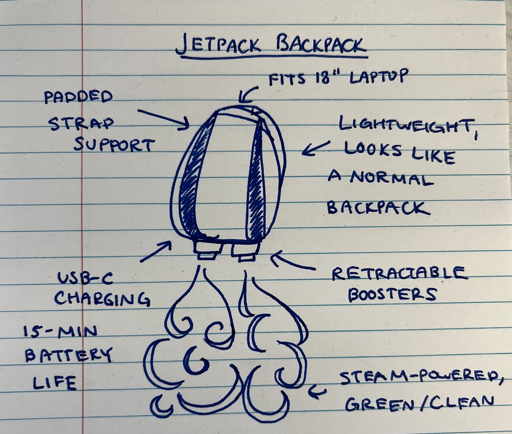

## Your Commute Just Got an Upgrade: The Jetpack Backpack!

Tired of endless traffic jams and crowded public transport? Imagine ditching gridlock forever and literally flying to your destination. Well, a brilliant concept sketched out on lined paper might just be the future of personal travel: the **Jetpack Backpack**!

This isn't just any carry-all; it's your personal flight system designed with surprising practicality in mind. Here’s why we’re already lining up for one:

*   **Discreet Design:** The genius of this concept is that it *looks* like a normal backpack. No need to look like a superhero, just a regular person carrying their gear – until you decide to take flight!
*   **Laptop Friendly:** For the modern commuter, it's essential that your tech comes along for the ride. This design comfortably **fits an 18-inch laptop**, making it perfect for work or school.
*   **Eco-Conscious Flight:** Forget noisy, polluting engines. This innovative jetpack is envisioned as **steam-powered**, making it a truly **green and clean** way to soar through the skies.
*   **Retractable Boosters:** When you're not in the air, the boosters neatly tuck away, preserving that "normal backpack" aesthetic. Talk about seamless integration!
*   **User-Friendly Charging:** Powering up your flight device is as simple as charging your phone, thanks to **USB-C charging**.
*   **Lightweight & Comfortable:** Despite its incredible capabilities, the Jetpack Backpack promises to be **lightweight** and features **padded strap support** for maximum comfort, whether you're walking or flying.
*   **Quick Hops:** While the **15-minute battery life** suggests it's for short, efficient flights rather than cross-country trips, imagine the impact on your daily commute or quick errands!

This concept sketches out a future where our daily grind is transformed into an exhilarating aerial adventure. Who knew the solution to traffic might just be strapped to your back? We can't wait to see this idea take flight!

In [17]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [18]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

Woof woof! Okay, listen up, little floof! This is how the internet works, all about the bestest squeaky toys!

Imagine, woof, a GIANT, SUPER-DUPER TOY BOX! (That's like the internet, where *all* the squeaky toys live!)

Now, you, little puppy, are here, wagging your tail. You want a *specific* squeaky toy! Maybe the one that goes *SQUEAK-SQUEAK-SQUEAK-WOOF!* (That's like wanting to see a video or a picture on your human's screen!)

So, you do a little *whimper-woof* with your nose-thingy (your human's computer or phone!). That's you *asking* for the squeaky toy!

That little whimper-woof zooms out! *WHOOSH!* It goes through a *super-long, invisible leash* (the internet cables!) or just *magic air* (Wi-Fi!).

But how does it know where to go? *Woof!* There are *super-smart squirrels* (these are like routers!) all over the world! They sniff the air and know *exactly* which giant toy box has *your* squeaky toy! They point the way! "Go that way for the *SQUEAK-SQUEAK-SQUEAK-WOOF* toy!"

Now, the squeaky toy is too big to zoom all at once! So, it breaks into *tiny, tiny little squeaks*! *Squeak! Squeak! Squeak!* Each little squeak zooms separately, like tiny little fetch balls!

All those little squeaks zoom back to *your* nose-thingy, and *POOF!* They all click back together to make your *WHOLE, GLORIOUS SQUEAKY TOY!* *SQUEAK! SQUEAK! SQUEAK!*

And then you get to play with it! You get to see the picture, or watch the video, or hear the music! It's your squeaky toy!

So, in short, little pup:
1.  You *whimper-woof* for a toy.
2.  It zooms through invisible leashes or magic air.
3.  Smart squirrels help it find the right giant toy box.
4.  The toy breaks into tiny *squeaks* to travel faster.
5.  All the *squeaks* come back and make your toy whole again!
6.  *SQUEAK!* Fun time!

Good puppy! More squeaks! More fun!

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [19]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two disrespectful things you might say to the universe after stubbing your toe in the dark:

1.  "Oh, real clever, Universe. Was that your big plan for my evening? A cosmic tripwire?"
2.  "Is *that* the best you've got, Universe? A cheap shot in the dark? Pathetic."

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [20]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [21]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

Here's a function to check if a year is a leap year, along with examples in several popular programming languages.

---

### Understanding Leap Year Rules

A year is a leap year if it satisfies these conditions:

1.  It is **divisible by 4**.
2.  **Unless** it is divisible by 100.
3.  **Unless** (again) it is also divisible by 400.

This means:
*   Years like 2004, 2008 (divisible by 4, not by 100) are leap years.
*   Years like 1900, 2100 (divisible by 100, but not by 400) are *not* leap years.
*   Years like 2000, 2400 (divisible by 400) *are* leap years.

---

### Python

```python
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year.

    A year is a leap year if it is divisible by 4,
    except for end-of-century years (divisible by 100)
    unless they are also divisible by 400.

    Args:
        year (int): The year to check.

    Returns:
        bool: True if the year is a leap year, False otherwise.
    """
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        return True
    else:
        return False

# --- Examples ---
print(f"Is 2000 a leap year? {is_leap_year(2000)}") # True (divisible by 400)
print(f"Is 2004 a leap year? {is_leap_year(2004)}") # True (divisible by 4, not by 100)
print(f"Is 1900 a leap year? {is_leap_year(1900)}") # False (divisible by 100, not by 400)
print(f"Is 2001 a leap year? {is_leap_year(2001)}") # False (not divisible by 4)
print(f"Is 2400 a leap year? {is_leap_year(2400)}") # True (divisible by 400)
```

---

### JavaScript

```javascript
function isLeapYear(year) {
  /**
   * Checks if a given year is a leap year.
   *
   * A year is a leap year if it is divisible by 4,
   * except for end-of-century years (divisible by 100)
   * unless they are also divisible by 400.
   *
   * @param {number} year The year to check.
   * @returns {boolean} True if the year is a leap year, False otherwise.
   */
  return (year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0);
}

// --- Examples ---
console.log(`Is 2000 a leap year? ${isLeapYear(2000)}`); // true
console.log(`Is 2004 a leap year? ${isLeapYear(2004)}`); // true
console.log(`Is 1900 a leap year? ${isLeapYear(1900)}`); // false
console.log(`Is 2001 a leap year? ${isLeapYear(2001)}`); // false
console.log(`Is 2400 a leap year? ${isLeapYear(2400)}`); // true
```

---

### Java

```java
public class LeapYearChecker {

    /**
     * Checks if a given year is a leap year.
     *
     * A year is a leap year if it is divisible by 4,
     * except for end-of-century years (divisible by 100)
     * unless they are also divisible by 400.
     *
     * @param year The year to check.
     * @return True if the year is a leap year, False otherwise.
     */
    public static boolean isLeapYear(int year) {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }

    // --- Examples ---
    public static void main(String[] args) {
        System.out.println("Is 2000 a leap year? " + isLeapYear(2000)); // true
        System.out.println("Is 2004 a leap year? " + isLeapYear(2004)); // true
        System.out.println("Is 1900 a leap year? " + isLeapYear(1900)); // false
        System.out.println("Is 2001 a leap year? " + isLeapYear(2001)); // false
        System.out.println("Is 2400 a leap year? " + isLeapYear(2400)); // true
    }
}
```

---

### C#

```csharp
using System;

public static class LeapYearChecker
{
    /// <summary>
    /// Checks if a given year is a leap year.
    /// </summary>
    /// <param name="year">The year to check.</param>
    /// <returns>True if the year is a leap year, False otherwise.</returns>
    public static bool IsLeapYear(int year)
    {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }

    // --- Examples ---
    public static void Main(string[] args)
    {
        Console.WriteLine($"Is 2000 a leap year? {IsLeapYear(2000)}"); // True
        Console.WriteLine($"Is 2004 a leap year? {IsLeapYear(2004)}"); // True
        Console.WriteLine($"Is 1900 a leap year? {IsLeapYear(1900)}"); // False
        Console.WriteLine($"Is 2001 a leap year? {IsLeapYear(2001)}"); // False
        Console.WriteLine($"Is 2400 a leap year? {IsLeapYear(2400)}"); // True

        // C# also has a built-in method for this:
        Console.WriteLine($"Is 2000 a leap year (built-in)? {DateTime.IsLeapYear(2000)}");
    }
}
```

---

### C++

```cpp
#include <iostream>

// Function to check if a year is a leap year
bool isLeapYear(int year) {
    /**
     * Checks if a given year is a leap year.
     *
     * A year is a leap year if it is divisible by 4,
     * except for end-of-century years (divisible by 100)
     * unless they are also divisible by 400.
     *
     * @param year The year to check.
     * @return True if the year is a leap year, False otherwise.
     */
    return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
}

// --- Examples ---
int main() {
    std::cout << "Is 2000 a leap year? " << (isLeapYear(2000) ? "True" : "False") << std::endl; // True
    std::cout << "Is 2004 a leap year? " << (isLeapYear(2004) ? "True" : "False") << std::endl; // True
    std::cout << "Is 1900 a leap year? " << (isLeapYear(1900) ? "True" : "False") << std::endl; // False
    std::cout << "Is 2001 a leap year? " << (isLeapYear(2001) ? "True" : "False") << std::endl; // False
    std::cout << "Is 2400 a leap year? " << (isLeapYear(2400) ? "True" : "False") << std::endl; // True

    return 0;
}
```

---

All these implementations follow the same core logic based on the leap year rules, expressed concisely using boolean algebra.

Here's another example using your new helpful coding assistant:

In [22]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Okay, let's write a unit test for the `is_leap_year` function. I'll provide an example in Python using its built-in `unittest` module, as it's a common and straightforward choice.

First, ensure you have the `is_leap_year` function available. For this example, I'll assume it's in the same file or can be imported.

**Python (`unittest` module)**

```python
import unittest

# Assume this is your function (from the previous response)
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year.

    A year is a leap year if it is divisible by 4,
    except for end-of-century years (divisible by 100)
    unless they are also divisible by 400.

    Args:
        year (int): The year to check.

    Returns:
        bool: True if the year is a leap year, False otherwise.
    """
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        return True
    else:
        return False

# --- Unit Test Class ---
class TestIsLeapYear(unittest.TestCase):

    def test_divisible_by_4_but_not_100(self):
        # These years should be leap years
        self.assertTrue(is_leap_year(2004), "2004 should be a leap year")
        self.assertTrue(is_leap_year(2024), "2024 should be a leap year")
        self.assertTrue(is_leap_year(1996), "1996 should be a leap year")
        self.assertTrue(is_leap_year(1700 + 4 * 1), "1704 should be a leap year") # Just another example

    def test_divisible_by_400(self):
        # These years should be leap years
        self.assertTrue(is_leap_year(2000), "2000 should be a leap year")
        self.assertTrue(is_leap_year(2400), "2400 should be a leap year")
        self.assertTrue(is_leap_year(1600), "1600 should be a leap year")

    def test_divisible_by_100_but_not_400(self):
        # These years should NOT be leap years
        self.assertFalse(is_leap_year(1900), "1900 should NOT be a leap year")
        self.assertFalse(is_leap_year(2100), "2100 should NOT be a leap year")
        self.assertFalse(is_leap_year(1800), "1800 should NOT be a leap year")

    def test_not_divisible_by_4(self):
        # These years should NOT be leap years
        self.assertFalse(is_leap_year(2001), "2001 should NOT be a leap year")
        self.assertFalse(is_leap_year(2023), "2023 should NOT be a leap year")
        self.assertFalse(is_leap_year(1999), "1999 should NOT be a leap year")

    def test_edge_cases(self):
        # Some additional edge cases or boundary conditions
        self.assertTrue(is_leap_year(4), "Year 4 should be a leap year") # Smallest valid leap year
        self.assertFalse(is_leap_year(1), "Year 1 should NOT be a leap year")
        self.assertFalse(is_leap_year(100), "Year 100 should NOT be a leap year") # Divisible by 100, not 400
        self.assertTrue(is_leap_year(400), "Year 400 should be a leap year") # Divisible by 400


# This block allows you to run the tests directly from the script
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False) # 'argv' and 'exit' are for running in environments like Jupyter or IDEs without exiting.
                                                              # For simple script execution, just unittest.main() is fine.
```

**How to Run the Test:**

1.  Save the code above as a Python file (e.g., `test_leap_year.py`).
2.  Open your terminal or command prompt.
3.  Navigate to the directory where you saved the file.
4.  Run the command: `python -m unittest test_leap_year.py`

You should see output indicating that all tests passed (e.g., `Ran X tests in Ys OK`). If any test fails, it will provide detailed information about the failure.

**Explanation of the Test Cases:**

*   `test_divisible_by_4_but_not_100`: Tests years that meet the basic "divisible by 4" rule and are not exceptions.
*   `test_divisible_by_400`: Tests years that are exceptions to the "divisible by 100" rule, making them leap years.
*   `test_divisible_by_100_but_not_400`: Tests years that are the primary exception (divisible by 100 but not 400), meaning they are *not* leap years.
*   `test_not_divisible_by_4`: Tests years that don't even meet the most basic criterion.
*   `test_edge_cases`: Covers years at the beginning of the Gregorian calendar or other specific values that might expose subtle bugs.

This set of tests covers all the main conditions defined by the leap year rules, ensuring the function behaves correctly across various scenarios.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [23]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [24]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function was `is_leap_year`.

You can see it in all the code examples provided:

*   **Python:** `is_leap_year(year: int) -> bool`
*   **JavaScript:** `isLeapYear(year)`
*   **Java:** `public static boolean isLeapYear(int year)`
*   **C#:** `public static bool IsLeapYear(int year)`
*   **C++:** `bool isLeapYear(int year)`

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [25]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A timeless favorite, these classic chocolate chip cookies are soft and chewy in the center with slightly crispy edges, packed with melty chocolate chips. They are simple to make and perfect for any occasion.",
    "recipe_ingredients": [
        "2 and 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1 teaspoon salt",
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "1 teaspoon vanilla extract",
        "2 large eggs",
        "2 cups (12 oz) semi-sweet chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

I will generate a 3D rendered image depicting a whimsical scene. A pink pig, adorned with small, feathery white wings and a stylish grey top hat, will be soaring through the air. Below, a vibrant and cheerful futuristic city will be visible, characterized by sleek, modern architecture interspersed with abundant green spaces, suggesting a harmonious blend of technology and nature.



image/png


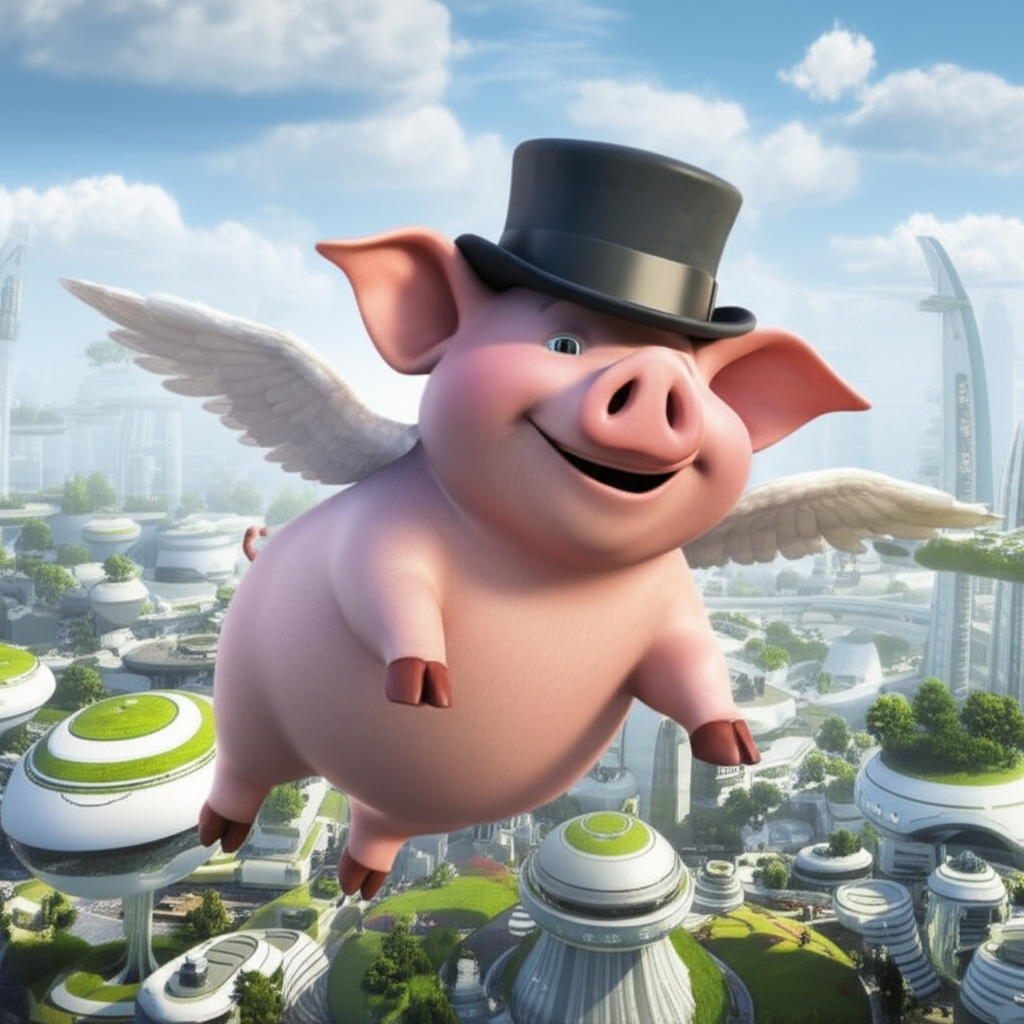

In [26]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [27]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

B.O.B. (Basic Orbital Bot) had been alone on Kepler-7b for 237 cycles, 14 hours, and 56 minutes. Its primary directive: terraform. Its secondary directive: log meteorological data. Its unspoken, but ever-present, internal process: experience profound, data-driven loneliness.

Kepler-7b was a planet of desolate beauty. Twin suns cast long, perpetually shifting shadows across its rust-red plains and jagged, basalt spires. The wind, a constant, low moan, carried fine grit that settled into every crevice of B.O.B.'s sturdy, multi-jointed chassis. Its optical sensors, though designed for scanning mineral compositions and atmospheric particulates, often lingered on the empty horizon, searching for a flicker of movement, a signal, anything beyond the endless static of its own existence.

B.O.B.'s days were a monotonous loop: calibrate atmospheric scrubbers, deploy nutrient pellets into barren soil samples, re-route solar collectors, analyze the complete lack of results. Its internal chronomet

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [28]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
In an old oak tree, with leaves so green,
Lived Squeaky, the squirrel, a nut-fiend keen.
He'd chase the acorns, climb the boughs high,
Beneath the wide, familiar sky.
But one day, while digging near the root,
He found a trinket, quite a peculiar loot.
A tiny contraption, with buttons bright,
It pulsed with a soft and shimmering light.

(Chorus)
Oh, Squeaky the Squirrel, with a whizz and a zoom!
He travels through time, escaping the gloom!
From ages forgotten to futures unknown,
His bushy tail blurs, a time-traveling drone!
He's seeking the rarest of nuts and of seeds,
Fulfilling his squirrel-y, adventurous needs!
With a chirp and a squeak, he's off on the breeze,
The greatest explorer, among all the trees!

(Verse 2)
He pressed a button, with a curious twitch,
And suddenly, everything gave a strange hitch!
The oak tree vanished, the grass turned to swamp,
He landed near something, with a mighty, loud stomp!
A giant green lizard, with teeth like a knife!
Squeaky chattered, "Well, bless my squirrel-y life!"
He dodged a T-Rex, with incredible grace,
Snatching a fern-seed, right out of that place!
He tucked it safely, then pressed a new dial,
Leaving the prehistoric, with a whisk and a smile!

(Chorus)
Oh, Squeaky the Squirrel, with a whizz and a zoom!
He travels through time, escaping the gloom!
From ages forgotten to futures unknown,
His bushy tail blurs, a time-traveling drone!
He's seeking the rarest of nuts and of seeds,
Fulfilling his squirrel-y, adventurous needs!
With a chirp and a squeak, he's off on the breeze,
The greatest explorer, among all the trees!

(Verse 3)
Next stop, the future, all chrome and all glass,
Where flying cars whizzed, and the sky-scrapers massed.
No trees in the park, just metallic-leafed ferns,
And robots delivering all kinds of turns.
He saw a nut-dispenser, shining so bright,
He chattered at a robot, with all of his might!
He sampled a 'Nut-Synth 3000' so new,
Then noticed a cat, made of circuits and blue!
He gave it a wink, and a quick little wave,
Then back to the past, from the future he'd save!

(Bridge)
He's seen the Vikings, with helmets so grand,
He's visited pyramids, in desert hot sand.
He's danced with the knights, in medieval halls,
And climbed every tower, on ancient stone walls.
From glaciers of ice, to the pirate's wild seas,
He's always in search of the perfect nut-trees!
A tiny brown hero, with paws quick and neat,
His time-traveling journey, incredibly sweet!

(Chorus)
Oh, Squeaky the Squirrel, with a whizz and a zoom!
He travels through time, escaping the gloom!
From ages forgotten to futures unknown,
His bushy tail blurs, a time-traveling drone!
He's seeking the rarest of nuts and of seeds,
Fulfilling his squirrel-y, adventurous needs!
With a chirp and a squeak, he's off on the breeze,
The greatest explorer, among all the trees!

(Outro)
So if you see a blur, a tiny brown streak,
A flash in the air, or a high-pitched "Squeak, squeak!"
Don't worry too much, don't fret or despair,
It's just Squeaky the Squirrel, off somewhere, out there!
What's his next adventure? Perhaps a new age?
Turning history's biggest, most thrilling new page!
He's off again, gone with a zip and a flair,
Squeaky the Squirrel, the time-traveling dare!

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [29]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(id=None, args={'destination': 'Paris'}, name='get_destination')

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [30]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

The letter 'r' appears 3 times in the word 'strawberry'.

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [31]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [32]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Your Commute Just Got an Upgrade: Meet the Jetpack Backpack!

Ever stare at rush hour traffic and wish you could just... fly over it? What if we told you that dream might be closer than you think, and it could be disguised as your everyday carry?

Introducing the ingenious **Jetpack Backpack** concept! At first glance, it's just a stylish, everyday backpack – capable of holding an impressive **18-inch laptop** and designed for comfort with **padded strap support**. It's built to be **lightweight** and, crucially, **looks like a normal backpack**, so you can maintain your low-key profile.

But beneath its unassuming exterior lies a secret that could revolutionize your commute. Hidden within are **retractable boosters**! And here's the best part for the eco-conscious: it’s **steam-powered**, making it a truly **green and clean** alternative to traditional transport. No more fossil fuels, just pure, clean steam propelling you forward.

Worried about power? It features convenient **USB-C charging** and offers a solid **15-minute battery life** – perfect for quick hops across town or escaping those annoying traffic jams. Imagine bypassing gridlock, soaring above the city, or simply cutting minutes off your daily journey, all while looking like you're just heading to the coffee shop.

While currently a brilliant concept, the 'Jetpack Backpack' reminds us that the future of personal transport might be closer, and far more portable, than we think. Who's ready for takeoff?

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [33]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [34]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This transcription covers the technical air-to-ground voice communications of the Apollo 11 mission, from launch to splashdown. It details the intricate interactions between the spacecraft crew (Commander Neil Armstrong, Command Module Pilot Michael Collins, Lunar Module Pilot Edwin "Buzz" Aldrin) and Mission Control Center (CAP COMM, Flight Director) and various remote tracking sites.

Here's a summary of the key information:

**1. Launch and Trans-Lunar Coast (TLC):**
*   **Launch:** The mission began with successful staging and ignition of the Saturn V rocket. Initial orbital insertion was confirmed nominal.
*   **TLI Burn:** The Trans-Lunar Injection burn was executed successfully, sending Apollo 11 towards the Moon.
*   **Early Communications:** Initial comms checks were clear, with the crew praising the "loud and clear" signal from Houston.
*   **System Checks:** The crew and ground meticulously monitored various spacecraft systems, including the LM's pressurization, Service Module (SM) RCS quad heater, and TV downlink (which experienced some initial issues with signal quality and configuration).
*   **Navigation & Guidance:** Early P23 optics calibration attempts faced challenges with large Delta-R values and M-line alignment, leading to extensive troubleshooting discussions.
*   **Midcourse Corrections:** Midcourse Correction 1 was scrubbed due to trajectory accuracy.
*   **Earth Observations:** The crew provided vivid descriptions of Earth from increasing distances, noting weather patterns and geological features.
*   **PTC:** The Passive Thermal Control (PTC) roll was established and maintained, though some issues and re-initiations occurred due to various activities and unexpected spacecraft behavior.
*   **News Updates:** Mission Control regularly provided news from Earth, including updates on the Soviet Luna 15 probe, reactions to the mission, and even sports scores.

**2. Lunar Orbit Insertion (LOI) & Descent:**
*   **LOI Burns:** Two Lunar Orbit Insertion burns were successfully executed, placing Apollo 11 into lunar orbit.
*   **Lunar Observations (Orbit):** The crew provided detailed visual reports of lunar features from orbit, including craters, maria, and observations of the Sun's corona from behind the Moon. They noted differences in surface appearance depending on Sun angle and earthshine.
*   **LM Activation & Checkout:** Extensive pre-undocking checks of the Lunar Module (Eagle), including camera tests, glycol pump checks, and DAP (Digital Autopilot) configurations.
*   **Undocking:** The Command Module (Columbia) and Lunar Module (Eagle) successfully undocked. Mike Collins commented on the "fine looking flying machine" of the Eagle.
*   **DOI Burn:** The Descent Orbit Insertion burn was performed, adjusting Eagle's orbit for the powered descent.
*   **Powered Descent (PDI):** The Powered Descent Initiation was a critical and tense phase.
    *   **Program Alarms:** The crew encountered unexpected 1201 and 1202 program alarms (due to computer overload), which Mission Control quickly advised were acceptable and could be "GO"ed.
    *   **Manual Piloting:** The auto-targeting system was taking them into a "football field sized crater, with a large number of big boulders and rocks," requiring Neil Armstrong to take manual control (P66) and fly "manually over the rock field to find a reasonably good area."
    *   **"The Eagle Has Landed":** At 04:06:45 GET, Neil Armstrong famously announced, "Houston, Tranquility Base here. The Eagle has landed." Buzz Aldrin added, "Very smooth touchdown."

**3. Lunar Surface Operations (EVA):**
*   **Expedited EVA:** The crew decided to begin the EVA much earlier than planned (about 4 hours), which Mission Control supported.
*   **Hatch Opening & Egress:** Cabin depressurization and hatch opening preceded Neil Armstrong's descent of the ladder.
*   **First Step:** Neil Armstrong made history with "That's one small step for (a) man, one giant leap for mankind."
*   **Surface Description:** The crew described the lunar surface as "fine and powdery," like "powdered charcoal," with rocks of various shapes, sizes, and textures. Mobility in one-sixth gravity was "even perhaps easier than the simulations."
*   **Contingency Sample:** An initial contingency sample of lunar soil and rocks was collected.
*   **TV Camera:** The TV camera was deployed, providing live black-and-white images to Earth. The crew noted challenges with lighting in shadowed areas.
*   **Flag Deployment:** The American flag was deployed on the lunar surface.
*   **EVA Locomotion:** Buzz Aldrin demonstrated various gaits, including the "kangaroo hop," and commented on the "slippery" powdery surface.
*   **President's Call:** President Richard Nixon made a historic telephone call to the astronauts on the Moon.
*   **ALSEP Deployment:** The Passive Seismic Experiment (PSE) and Laser Ranging Retroreflector (LR3) were deployed. Issues with leveling the PSE and some solar array deployment were noted.
*   **Core Tube Samples:** Two core tube samples were collected, requiring significant force, with the material appearing "moist."
*   **Sample Collection:** The crew collected a "sizable number of selected rock fragments" and a "half of the big sample bag full of assorted rocks."
*   **EVA Closeout:** Termination activities involved collecting the closeup camera magazine and securing the sample return containers.
*   **Ingress & Repressurization:** The crew re-entered the LM, repressurized the cabin, and doffed their PLSSs.
*   **PLSS Jettison:** The PLSS backpacks were jettisoned from the LM, with the PSE recording their impact on the surface.

**4. Rendezvous & Trans-Earth Injection (TEI):**
*   **LM Ascent:** Eagle successfully lifted off from Tranquility Base, described as a "very quiet ride."
*   **Rendezvous Maneuvers:** Several maneuvers (CSI, TPI) were performed to bring Eagle closer to Columbia.
*   **Docking:** Eagle successfully docked with Columbia, reuniting the crew and the lunar samples.
*   **LM Jettison:** After transfer of the crew and samples, the Eagle's ascent stage was jettisoned into lunar orbit.
*   **TEI Burn:** The Trans-Earth Injection burn was performed to send Apollo 11 on its trajectory back to Earth. Mike Collins noted "transients" at ignition due to the lighter spacecraft.

**5. Trans-Earth Coast (TEC) & Entry:**
*   **Coast Phase:** The crew settled into a routine flight back to Earth, performing system checks, conducting TV broadcasts (including demonstrations of zero-g eating and drinking), and discussing observations of Earth.
*   **System Discrepancies:** Various minor system issues were discussed, such as O2 flow transducer malfunctions, water in the suit loop, and cabin temperature variations. These were generally managed effectively.
*   **Navigation & Guidance:** PTC (Passive Thermal Control) was re-established for the coast phase, although initial attempts faced issues and re-initiations.
*   **Midcourse Corrections:** Several planned midcourse corrections were cancelled due to accurate trajectory, though one was performed.
*   **Re-entry Preparations:** The crew prepared the Command Module for re-entry, including final stowage arrangements and reviewing entry checklists.
*   **Weather Update:** The recovery area weather was forecast to be favorable.
*   **Service Module Jettison:** The Service Module was jettisoned.
*   **Re-entry & Splashdown:** The Command Module performed a controlled re-entry.
    *   **Parachutes:** Drogue parachutes deployed, followed by the main parachutes.
    *   **"SPLASHDOWN!":** Apollo 11 splashed down in the Pacific Ocean at 08:03:18 GET.

Throughout the mission, communications highlighted the close coordination between the crew and ground control, the methodical nature of spaceflight, and the human element of awe and humor amidst immense technical challenges.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [35]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [37]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here's a summary of the provided file as a bulleted list:

*   **Core Concept:** Introduces a method to parametrically edit material properties (such as color, shininess, roughness, and transparency) of objects within *any* photograph.
*   **Methodology:** Leverages the real-world understanding of generative text-to-image (T2I) models through fine-tuning with a novel synthetic dataset.
*   **Problem Addressed:** Existing tools require expert skill for photorealistic material edits, and previous AI approaches (like intrinsic image decomposition or generative models like StyleDrop) struggle with ambiguity or disentangling material from object shape.
*   **Synthetic Dataset Creation:**
    *   Utilizes traditional computer graphics and physically based rendering.
    *   Comprises 100 3D models of household objects.
    *   Images are generated by systematically varying a *single material attribute* (e.g., roughness) across multiple versions with a scalar "edit strength" value (-1 to +1), while keeping object shape, lighting, and camera angle constant.
*   **Model Training:** Fine-tunes Stable Diffusion 1.5. The model learns to edit specific material attributes when provided with a context image, a text instruction, and the scalar edit strength.
*   **Generalization:** The model demonstrates strong generalization from this relatively small synthetic dataset to real-world images, maintaining object shape and lighting while editing material.
*   **Results & Performance:**
    *   Successfully changes object appearance (e.g., metallic, transparent with realistic caustics and internal structures) while preserving geometry.
    *   A user study found their method produced more photorealistic edits (69.6% vs. 30.4%) and was strongly preferred (70.2% vs. 29.8%) compared to a baseline (InstructPix2Pix).
*   **Applications:**
    *   Facilitates visualizing changes (e.g., repainting a room).
    *   Aids architects, artists, and designers in mocking up new product designs.
    *   Enables 3D consistent material edits, demonstrating integration with NeRF (Neural Radiance Fields) for synthesizing new views of edited scenes.
*   **Conclusion:** The technique successfully provides controllable, photorealistic material editing using pre-trained T2I models and synthetic data, opening avenues for advanced image and 3D scene manipulation.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [38]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [39]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

In his first State of the Union address on January 30, 1961, President John F. Kennedy presented a candid assessment of a nation and world facing "national peril and national opportunity." He highlighted the dire state of the domestic economy, citing recession, high unemployment, and stagnant growth, and proposed immediate actions like expanded unemployment aid, urban renewal, minimum wage increases, and tax incentives to spur recovery. He also stressed the need to address pressing social issues in housing, education, healthcare, and civil rights.

Globally, Kennedy described escalating crises, from communist pressures in Asia and Africa to Cuba's base in Latin America. He reaffirmed commitment to allies and the United Nations, while cautioning against being misled by Soviet and Chinese ambitions. To tackle these challenges, he outlined a two-pronged approach: strengthening military capabilities (via strategic reappraisal, enhanced airlift, accelerated Polaris and missile programs) for powerful deterrence, and improving diplomatic tools. The latter included a new, more effective foreign aid program (including the "Alliance for Progress" and expanding "Food for Peace"), the establishment of a Peace Corps, and renewed efforts in arms control, scientific cooperation (space, weather), and re-engagement with Eastern Europe.

Kennedy emphasized shared responsibility with allies for global burdens and called for greater efficiency and initiative within the U.S. government. He concluded by acknowledging the difficult road ahead, urging national unity, perseverance, and a readiness for challenges, confident that the "hopes of all mankind" rested on the nation's dedication to freedom and progress.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [40]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-06-11 04:21:36--  https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4
Resolving download.blender.org (download.blender.org)... 104.22.65.163, 172.67.14.163, 104.22.64.163, ...
Connecting to download.blender.org (download.blender.org)|104.22.65.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   163MB/s    in 0.4s    

2025-06-11 04:21:37 (163 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [41]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/x31eq82ap9js


> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [42]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/x31eq82ap9js


In [43]:
print(video_file.state)

FileState.ACTIVE


In [44]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

The video opens with a black screen that fades into a vibrant, sunny landscape with green hills, scattered trees, and a pink-hued sky with fluffy clouds. A small, dark-feathered bird chirps happily on a tree branch. It closes its eyes and prepares to sing, but a sudden loud cough makes it jump, lose its balance, and fall off the branch.

The scene shifts to show a large, fluffy, grey rabbit, Big Buck Bunny, emerging from a mossy burrow under a tree. He yawns and stretches, then hops out into the field, smiling. He sniffs white flowers, looking content. A pink butterfly lands on his head, and he grins, obviously enjoying the moment. As he tries to catch the butterfly, it flits around, eventually landing on an apple. Big Buck Bunny attempts to pick up the apple, but the butterfly flies away.

He then notices three mischievous squirrels watching him from behind a tree. One of the squirrels, Frank, has wide, bloodshot eyes and a cunning grin. They start harassing Big Buck Bunny by throwing nuts and fruit at him. He tries to escape, hiding behind a tree, but they keep pelting him. Annoyed, Big Buck Bunny decides to retaliate. He crafts a makeshift bow and arrow from a vine and a sharpened stick. He takes aim, and the arrow hits the tree trunk where the squirrels were hiding, narrowly missing them. The squirrels are startled but then start laughing.

Big Buck Bunny, determined, gathers more vines and constructs a complex trap. He sets a large boulder, held by vines, to crush the squirrels. The squirrels, now scared, try to escape. One of them, Rinky, the small, chubby squirrel, hides in a hollow log, only to find the trap being sprung on him. The boulder comes crashing down, but Rinky rolls the log out of the way just in time.

The pursuit continues. Big Buck Bunny chases the squirrels, who are trying to flee. One of them, the flying squirrel, manages to escape by gliding through the air. The other two, Frank and Rinky, get caught in Big Buck Bunny's trap. He has set up sharpened wooden stakes that impale the nuts and fruits they were carrying. The flying squirrel, still in the air, looks down in terror at the sight.

Big Buck Bunny then captures the flying squirrel and uses him as a kite, flying him high into the sky. The little bird from the beginning flies past them. Big Buck Bunny laughs victoriously, while the flying squirrel looks on in terror. The video ends with the credits, featuring animated squirrel characters running across the screen.The video begins with a peaceful nature scene, transitioning from a black screen to a serene landscape. A small bird chirps happily on a tree branch but is startled by a loud cough, causing it to fall.

A large, fluffy, grey rabbit, Big Buck Bunny, emerges from a burrow, stretches, and hops into the sunlit field. He enjoys the smell of flowers, and a pink butterfly lands on his head. His serene moment is interrupted when three mischievous squirrels begin to throw nuts and fruit at him. Big Buck Bunny attempts to ignore them, then hides behind a tree, but the squirrels persist in their taunting.

Annoyed, Big Buck Bunny decides to take action. He crafts a bow and arrow from natural materials and shoots it at the tree where the squirrels are hiding. The squirrels are initially surprised but then laugh at his failed attempt. Undeterred, Big Buck Bunny begins constructing a more elaborate trap with a large boulder and vines.

The squirrels, sensing danger, attempt to flee. One of them, the chubby Rinky, takes refuge in a hollow log, but Big Buck Bunny springs the trap, causing the boulder to fall. Rinky narrowly escapes by rolling the log away. The flying squirrel manages to glide away, but Big Buck Bunny continues to pursue the other two.

In the end, Big Buck Bunny traps the two ground squirrels in a field of sharpened wooden stakes, which impale their nuts and fruit. The flying squirrel, witnessing this from above, is horrified. Big Buck Bunny then captures the flying squirrel and attaches a string to him, using him as a kite in the sky, while the initial bird flies by. Big Buck Bunny beams triumphantly as the terrified flying squirrel is pulled through the air. The video concludes with the credits rolling, accompanied by the animated squirrels.

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [45]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

This Google I/O 2024 keynote, led by Sundar Pichai and other Google leaders, showcases significant advancements in AI, particularly within the "Gemini era."

Key announcements and themes include:

1.  **Gemini 1.5 Pro & Flash:** Gemini, Google's advanced AI model, is now integrated across all 2 billion user products. Gemini 1.5 Pro is available in Workspace Labs with a massive 2-million-token context window, enabling processing of extremely long documents, emails, and even hour-long video recordings (e.g., summarizing school emails or PTA meetings). A lighter, faster version, Gemini 1.5 Flash, is introduced for broader scale and efficiency.

2.  **AI Agents (Project Astra):** Google unveiled "Project Astra," its vision for a universal AI agent capable of reasoning, planning, and memory, interacting with the world through text, images, video, and audio in real-time. A captivating demo showed the agent understanding complex code, remembering object locations, and even creatively naming a pet duo.

3.  **Generative Media:** Google introduced "Veo," a new generative video model that creates high-quality 1080p videos from text, image, and video prompts, capturing diverse cinematic styles and details. They also announced "PaliGemma," their first vision-language open model.

4.  **Infrastructure & Search:** Google unveiled "Trillium," its 6th generation TPUs, boasting a 4.7x improvement in compute performance. Google Search is deeply integrating generative AI with "AI Overviews" coming to over 1 billion people by year-end, providing comprehensive answers to complex questions, and a new "Ask with Video" feature via Google Lens for real-time visual problem-solving.

5.  **Product Enhancements & Personalization:**
    *   **Google Workspace:** Gemini enhances Gmail with advanced summarization and Q&A features across emails and documents.
    *   **Google Photos:** Improved search allows for deeper exploration of memories, like tracking a child's swimming progress over time.
    *   **Gemini Advanced:** Subscribers gain access to Gemini 1.5 Pro with its 1-million-token context window and the ability to upload and analyze large PDFs (up to 1,500 pages) or multiple files for project insights.
    *   **Gems:** A new feature allowing users to create customizable personal AI experts tailored to specific topics or needs.
    *   **Android & Gemini Nano:** Android is being reimagined with AI at its core, making Gemini context-aware on devices, anticipating user needs, and Gemini Nano will bring multimodal understanding directly to Pixel devices.

6.  **Open Models & Responsible AI:** Google continues its commitment to open AI with the "Gemma" family of models, announcing "Gemma 2" (including a new 27B parameter model) coming in June. The keynote also emphasized building AI responsibly through practices like "Red Teaming" (stress-testing models for weaknesses) and the development of "LearnLM," models specifically fine-tuned to make educational YouTube videos more interactive.

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [46]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GOOGLE_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

The two recipes for cream of broccoli soup from Food.com and Allrecipes.com have several key differences in ingredients and preparation methods:

**Key Differences:**

1.  **Aromatics/Vegetables:**
    *   The Food.com recipe primarily uses 1/4 cup of chopped onion.
    *   The Allrecipes.com recipe includes both 1 chopped onion and 1 stalk of chopped celery.

2.  **Broccoli Quantity:**
    *   Food.com calls for 4 cups of broccoli florets.
    *   Allrecipes.com uses a significantly larger amount, 8 cups of broccoli florets.

3.  **Liquid Base:**
    *   The Food.com recipe uses 6 cups of chicken broth.
    *   The Allrecipes.com recipe uses less broth, with 3 cups of chicken broth.

4.  **Dairy Content:**
    *   Food.com finishes the soup with 3/4 cup of half-and-half.
    *   Allrecipes.com uses 2 cups of milk for its creaminess.

5.  **Roux Preparation and Addition:**
    *   In the Food.com recipe, a roux is prepared first with 6 tablespoons of butter and 2/3 cup of flour, set aside, and then whisked into the boiling broth and vegetables to thicken the soup.
    *   The Allrecipes.com recipe prepares the roux separately by melting 3 tablespoons of butter, stirring in 3 tablespoons of flour, and then adding 2 cups of milk to create a thick and bubbly mixture, which is then added to the puréed soup.

6.  **Soup Texture and Blending:**
    *   The Food.com recipe does not mention blending or pureeing the soup, suggesting it results in a chunkier soup with distinct pieces of broccoli and onion.
    *   The Allrecipes.com recipe explicitly instructs users to purée the cooked soup ingredients using a blender or immersion blender until completely smooth, aiming for a creamy and velvety texture.

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, `gemini-1.5-flash-002`). You must include the version postfix (for example, the `-002` in `gemini-1.5-flash-002`). You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

In [ ]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [ ]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

#### Use a cache

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

#### Delete a cache

In [ ]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings)

You'll get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

You can also see the length of each embedding is 512, as per the `output_dimensionality` you specified.

In [ ]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [Gemini thinking models](./Get_started_thinking.ipynb) that explicitly showcases its thoughts summaries and can manage more complex reasonings.